In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [58]:
data = pd.read_csv('eraser.csv')
data.columns=['shift', 'concs', 's1']
data = data.sort_values(by = 'shift')


In [59]:
data['shift'] = data['shift']  #now opt path in micro m
levelwithout = max(data['concs'])*2 
levelnoise = max(data['concs'])*2  + np.random.uniform(-np.sqrt(levelwithout), np.sqrt(levelwithout), len(data['concs']))

In [60]:
x = data['shift']
y = data['concs']

In [61]:
shift_down= max(y)/2
y -= shift_down

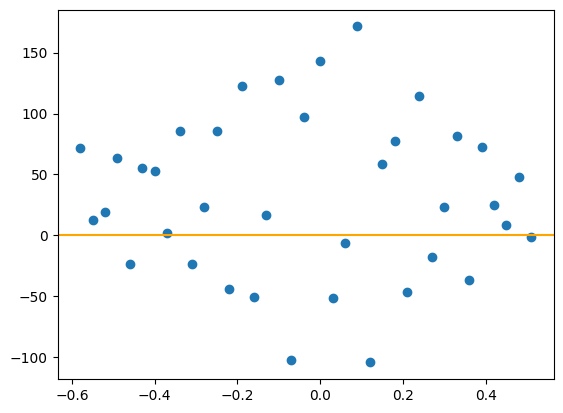

In [62]:
plt.scatter(x, y )
plt.axhline(0, color='orange')
# plt.xlim(0,.1)

In [63]:
def gaussian_sin(x, amp_gauss, mu, sigma, freq, phase, offset):
    gaussian = amp_gauss * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    sinusoid =  np.sin(freq* x + phase)
    return gaussian * sinusoid + offset

def sin(x,freq, phase ):
    sinusoid =  np.sin(freq* x + phase)
    return sinusoid


def gaussian(x, amp_gauss, mu, sigma, offset):
    gaussian = amp_gauss * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return gaussian + offset

In [64]:

# Initial guess for the parameters
initial_guess = [100,0, 4, 1, 5, 100]  # [amp_gauss, mu, sigma, amp_sin, freq, phase, offset]


In [65]:
# Perform the curve fitting
params, covariance = curve_fit(gaussian_sin, x, y, p0=initial_guess)

C:\Users\alexr\AppData\Local\Temp\ipykernel_21528\410747014.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(gaussian_sin, x, y, p0=initial_guess)


In [66]:
# Get the fitted values
xlin = np.linspace(-1,1, 5000)
fitted_y = gaussian_sin(xlin, *params)
initial_y = gaussian_sin(xlin, *initial_guess)
eval_gaussian = gaussian(xlin, -1*params[0], *params[1:3], params[-1])

In [67]:
conv_factor = 0.017839076356638374 

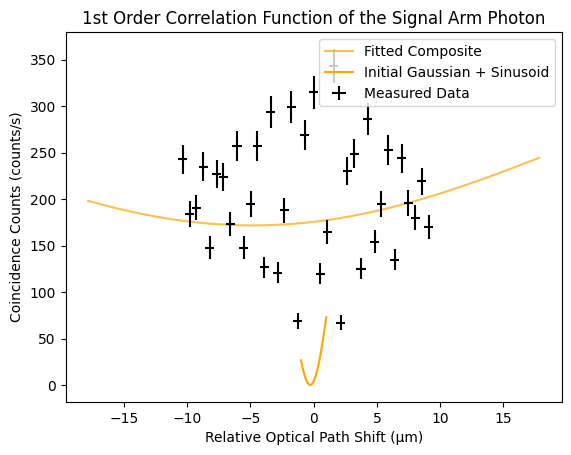

In [68]:


# Plot the data and the fit
plt.plot(xlin  * conv_factor *1e3, fitted_y+shift_down, label='Fitted Composite', color='orange', alpha = 0.7)
# plt.plot(xlin * conv_factor*1e3, eval_gaussian+shift_down, color = 'red', linestyle = 'dashed')
plt.errorbar(x = x * conv_factor *1e3 , y = y+shift_down, yerr = np.sqrt(y+shift_down), xerr = [20* conv_factor]*len(x), label='Measured Data', color='black', fmt ='none')
plt.plot(xlin, initial_y, label='Initial Gaussian + Sinusoid', color='orange')
# plt.xlim(0, 0.1)
# plt.axvline(2*params[2]*conv_factor*1e3, linestyle = 'dashed', color = 'black', label ='2 sigma')
# plt.axvline(-2*params[2]*conv_factor*1e3,linestyle = 'dashed', color = 'black')
plt.xlabel('Relative Optical Path Shift (μm)')
plt.ylabel('Coincidence Counts (counts/s)')
plt.title('1st Order Correlation Function of the Signal Arm Photon')

# plt.xlim(10,15)
plt.legend()
plt.show()

# Print the fitting parameters

In [69]:
uncertainties = np.sqrt(np.diag(covariance))
uncertainties

array([inf, inf, inf, inf, inf, inf])

In [70]:
sigma2 = 2*params[2]*conv_factor*1e3
sigma22_unc = 2*uncertainties[2]*conv_factor*1e3
equip_unc = 2*20*conv_factor
print(sigma2*2, sigma22_unc, equip_unc*2)

285.42522170621396 inf 1.4271261085310698


In [71]:
print('amp_gauss, mu, sigma, freq, phase, offset')
print(  params,'\n', uncertainties)


amp_gauss, mu, sigma, freq, phase, offset
[100.   0.   4.   1.   5. 100.] 
 [inf inf inf inf inf inf]
